# Housing Price Prediction Project

#### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

Importing the important libraries for data reading and cleaning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data using the url path.

In [2]:
df=pd.read_csv('house_train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We have combination of numerical and categorical. Our target feature is also categorical

Lets the check all columns

df.columns

In [4]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
pd.set_option('display.max_rows',None)
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

Checking for the missing data using isnull 

In [5]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

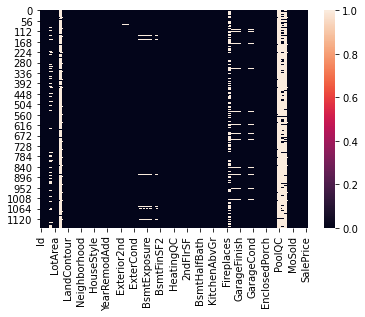

In [6]:
sns.heatmap(df.isnull())  #checking null values

In dataset ID is just for serial number not giving any information so we will drop ID column. Then 'Alley','MiscFeature','PoolQC' these columns are having more than 80% NA data so we will drop these columns

In [7]:
df.drop(columns = ['Alley','MiscFeature','PoolQC','Id'],axis=1,inplace=True)

In [8]:
df.shape

(1168, 77)

Only LotFrontage,MasvnrArea, GarageyrBlt are numeric columns with null data

In [9]:
# Get unique and top values for the dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260  ...   
std      30.145255     20.785185   182.595606   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

LotFrontage,MasvnrArea, GarageyrBlt will fill NA with mean values

In [10]:
feature=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in df[feature]:
    df[i]=df[i].fillna(df[i].mean())

Now remaining null catogoricle features values will replace with NA

In [11]:
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['Fence'] = df['Fence'].fillna('NA')
df['MasVnrType'] = df['MasVnrType'].fillna('NA')

#####  Encoder to encode the categorical data

In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
en = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = en.fit_transform(df[i].values.reshape(-1,1))

Now we will Check for the data correlation on the dependent variable with the independent variables

In [13]:
data_corr = df.corr()
data_corr['SalePrice'].
sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
GarageCond       0.249340
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
GarageQual       0.192392
RoofMatl         0.159865
BedroomAbvGr     0.158281
Fence            0.143922
Functional       0.118673
ExterCond        0.115167
Exterior1st 

So from above corelation we can observe these are features are highly positively corelated with Sales price 'OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,
FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt  
Foundation,BsmtFinSF1,OpenPorchSF,2ndFlrSF,LotFrontage,WoodDeckSF,HalfBath,LotArea       
GarageCond,CentralAir,Electrical,PavedDrive,SaleCondition,BsmtUnfSF,BsmtFullBath    
HouseStyle


And highly negatively corelated with Sales price
LotShape,BsmtExposure,HeatingQC,GarageType,GarageFinish,KitchenQual,BsmtQual,ExterQual

And Utilities having all NAN so we will drop Utilities 

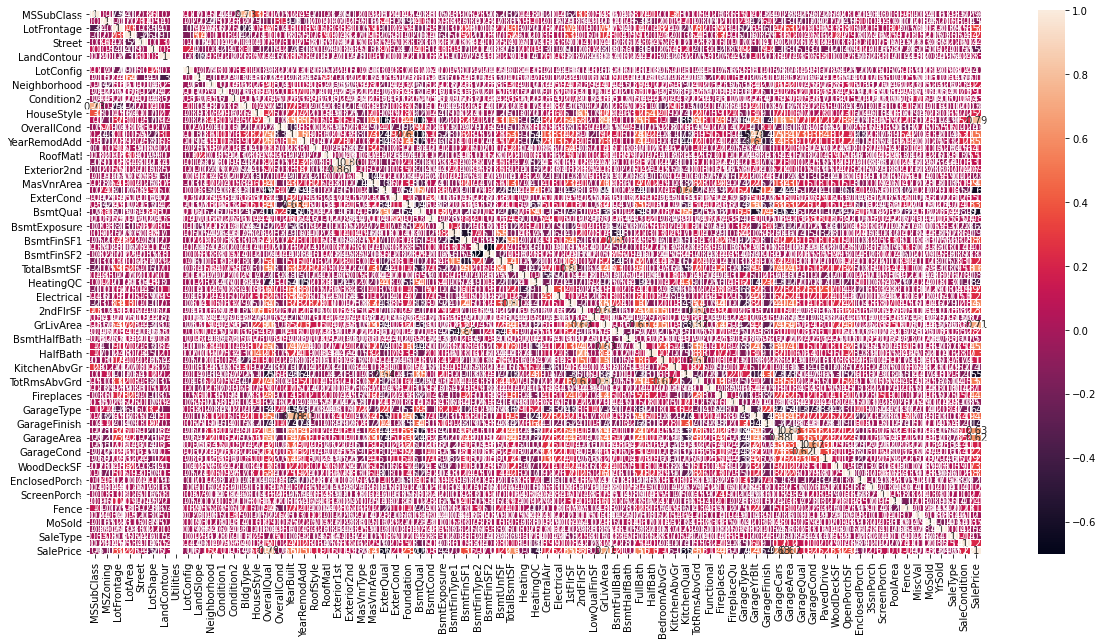

In [14]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

In [15]:
df.drop(columns = ['Utilities'],axis=1,inplace=True)

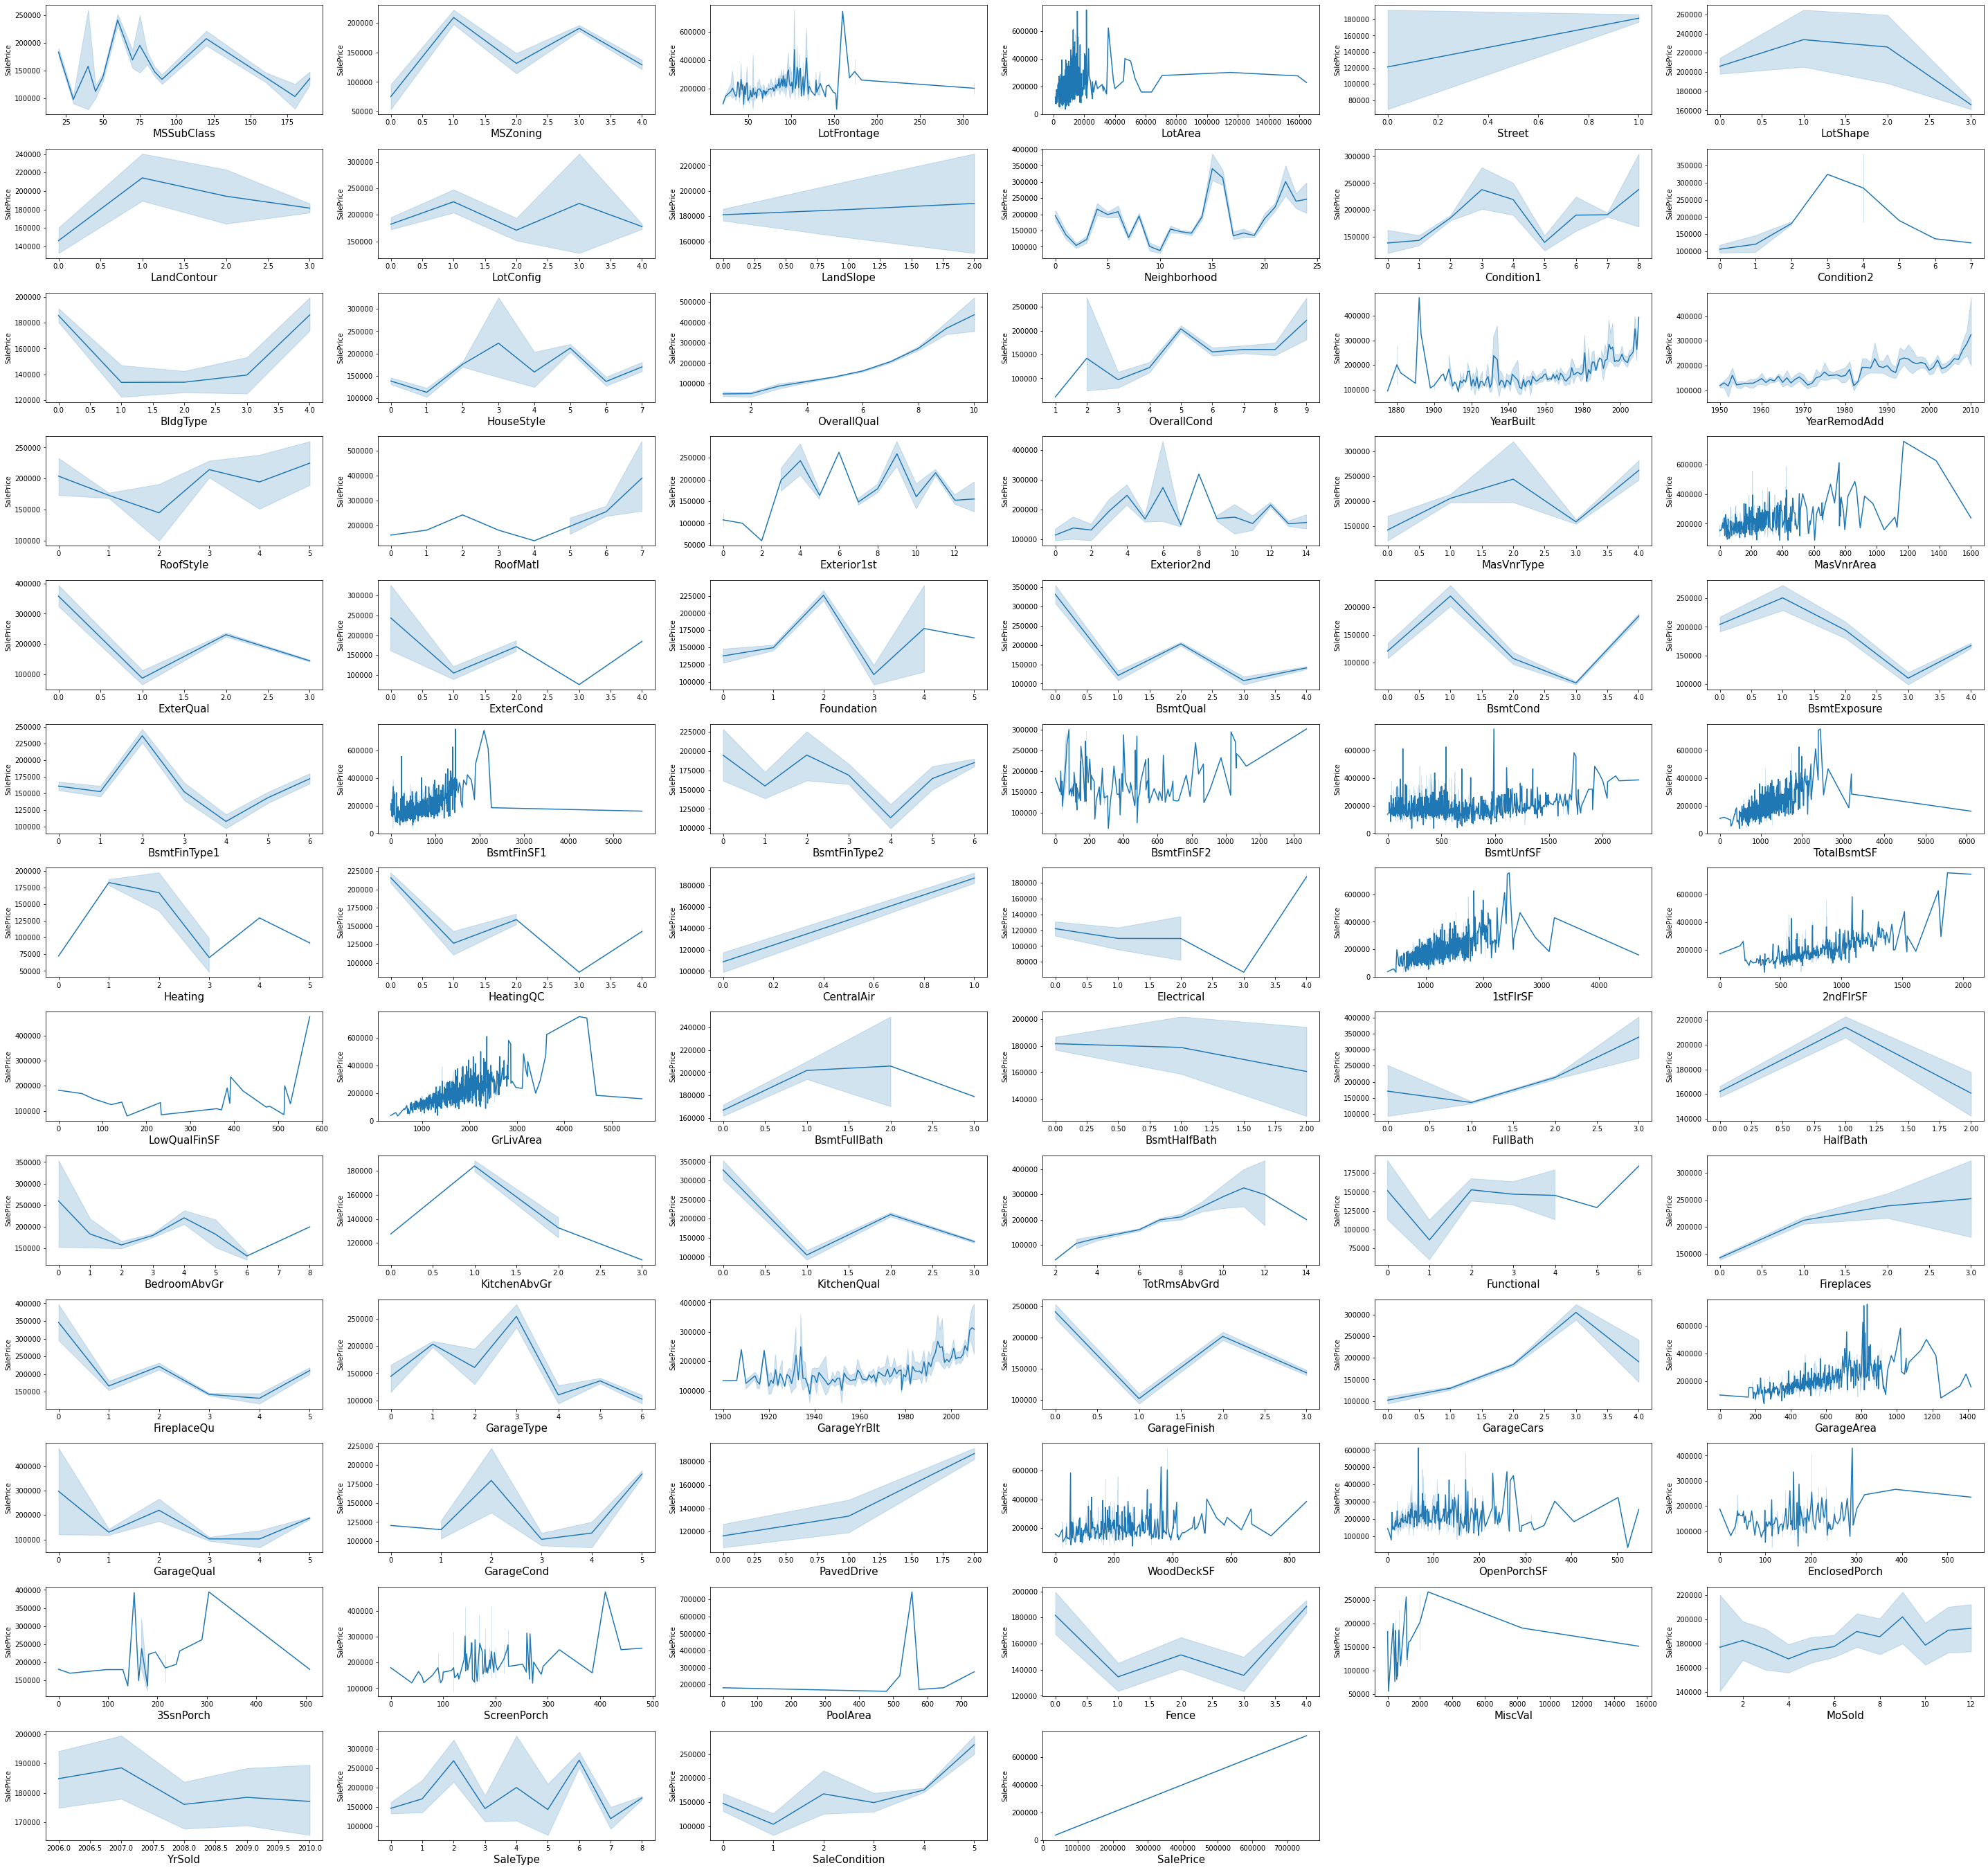

In [16]:
plt.figure(figsize = (40,40))
pltnum = 1
for i in df:
    if pltnum <= 80:
        plt.subplot(14,6, pltnum)
        sns.lineplot(x=i,y='SalePrice',data=df)
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

Visualizing the outliers using the boxplot

MSSubClass         AxesSubplot(0.125,0.787927;0.0545775x0.0920732)
MSZoning         AxesSubplot(0.190493,0.787927;0.0545775x0.0920...
LotFrontage      AxesSubplot(0.255986,0.787927;0.0545775x0.0920...
LotArea          AxesSubplot(0.321479,0.787927;0.0545775x0.0920...
Street           AxesSubplot(0.386972,0.787927;0.0545775x0.0920...
LotShape         AxesSubplot(0.452465,0.787927;0.0545775x0.0920...
LandContour      AxesSubplot(0.517958,0.787927;0.0545775x0.0920...
LotConfig        AxesSubplot(0.583451,0.787927;0.0545775x0.0920...
LandSlope        AxesSubplot(0.648944,0.787927;0.0545775x0.0920...
Neighborhood     AxesSubplot(0.714437,0.787927;0.0545775x0.0920...
Condition1       AxesSubplot(0.77993,0.787927;0.0545775x0.0920732)
Condition2       AxesSubplot(0.845423,0.787927;0.0545775x0.0920...
BldgType           AxesSubplot(0.125,0.677439;0.0545775x0.0920732)
HouseStyle       AxesSubplot(0.190493,0.677439;0.0545775x0.0920...
OverallQual      AxesSubplot(0.255986,0.677439;0.0545775x0.092

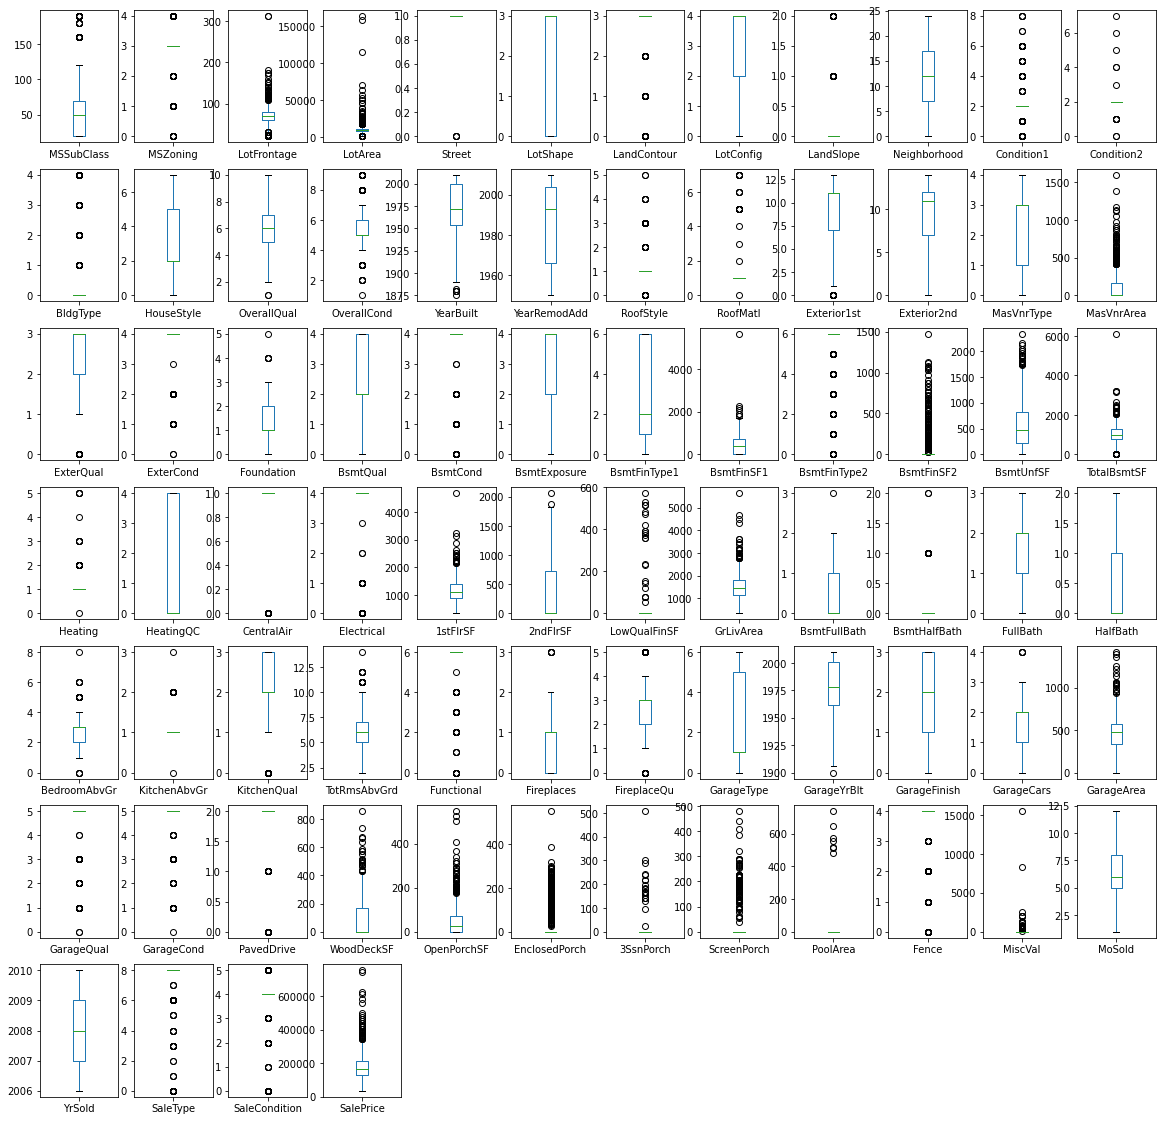

In [17]:
df.plot(kind='box',subplots=True,layout=(7,12),figsize=(20,20))

we can observe these features are having outliers 'LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF',
       'LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','Fence','MiscVal','SaleType', 'SaleCondition' we will try to remove outliers with zscore 

In [18]:
# removing outliers by Zscore
features=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','1stFlrSF','LowQualFinSF',
          'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','Fence','MiscVal','SaleType','SaleCondition']
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<8).all(axis=1)]
df1.head(5)

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120       3.0     70.98847     4928     1.0       0.0          3.0   
1          20       3.0     95.00000    15865     1.0       0.0          3.0   
2          60       3.0     92.00000     9920     1.0       0.0          3.0   
3          20       3.0    105.00000    11751     1.0       0.0          3.0   
4          20       3.0     70.98847    16635     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  ...  3SsnPorch  ScreenPorch  PoolArea  \
0        4.0        0.0          13.0  ...          0            0         0   
1        4.0        1.0          12.0  ...          0          224         0   
2        1.0        0.0          15.0  ...          0            0         0   
3        4.0        0.0          14.0  ...          0            0         0   
4        2.0        0.0          14.0  ...          0            0         0   

   Fence  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    4.0        0       2    2007       8.0            4.0     128000  
1    4.0        0      10    2007       8.0            4.0     268000  
2    4.0        0       6    2007       8.0            4.0     269790  
3    2.0        0       1    2010       0.0            4.0     190000  
4    4.0        0       6    2009       8.0            4.0     215000  

[5 rows x 76 columns]

In [19]:
df1.shape

(1119, 76)

In [20]:
df.shape

(1168, 76)

In [21]:
# Let's check the the data loss
data_loss = (1168-1119)/1168*100
data_loss

4.195205479452055

4.2% loss by Zscore which is less than 5%. So we will go for Zscore

In [28]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 8 * IQR)) |(df > (Q3 + 8 * IQR))).any(axis=1)]

In [29]:
df_1.shape

(155, 76)

In [30]:
# Let's check the the data loss
data_loss = (1168-155)/1168*100
data_loss

86.72945205479452

Very High dataloss using IQR so we will go for Zscore

In [31]:
df1.skew()

MSSubClass        1.422060
MSZoning         -1.705609
LotFrontage       0.716133
LotArea           3.269748
Street            0.000000
LotShape         -0.622543
LandContour      -3.267184
LotConfig        -1.162836
LandSlope         5.040971
Neighborhood      0.057895
Condition1        3.116130
Condition2        7.673385
BldgType          2.314447
HouseStyle        0.285028
OverallQual       0.157192
OverallCond       0.601976
YearBuilt        -0.589899
YearRemodAdd     -0.510156
RoofStyle         1.509426
RoofMatl          9.545839
Exterior1st      -0.615743
Exterior2nd      -0.596100
MasVnrType       -0.550699
MasVnrArea        2.542936
ExterQual        -1.831179
ExterCond        -2.557072
Foundation       -0.020299
BsmtQual         -0.477206
BsmtCond         -2.846851
BsmtExposure     -0.987132
BsmtFinType1      0.096360
BsmtFinSF1        0.775786
BsmtFinType2     -3.191550
BsmtFinSF2        4.251484
BsmtUnfSF         0.929644
TotalBsmtSF       0.603531
Heating           8.613725
H

Checking for data distribution to check for skewness with distplot in the continuous variables

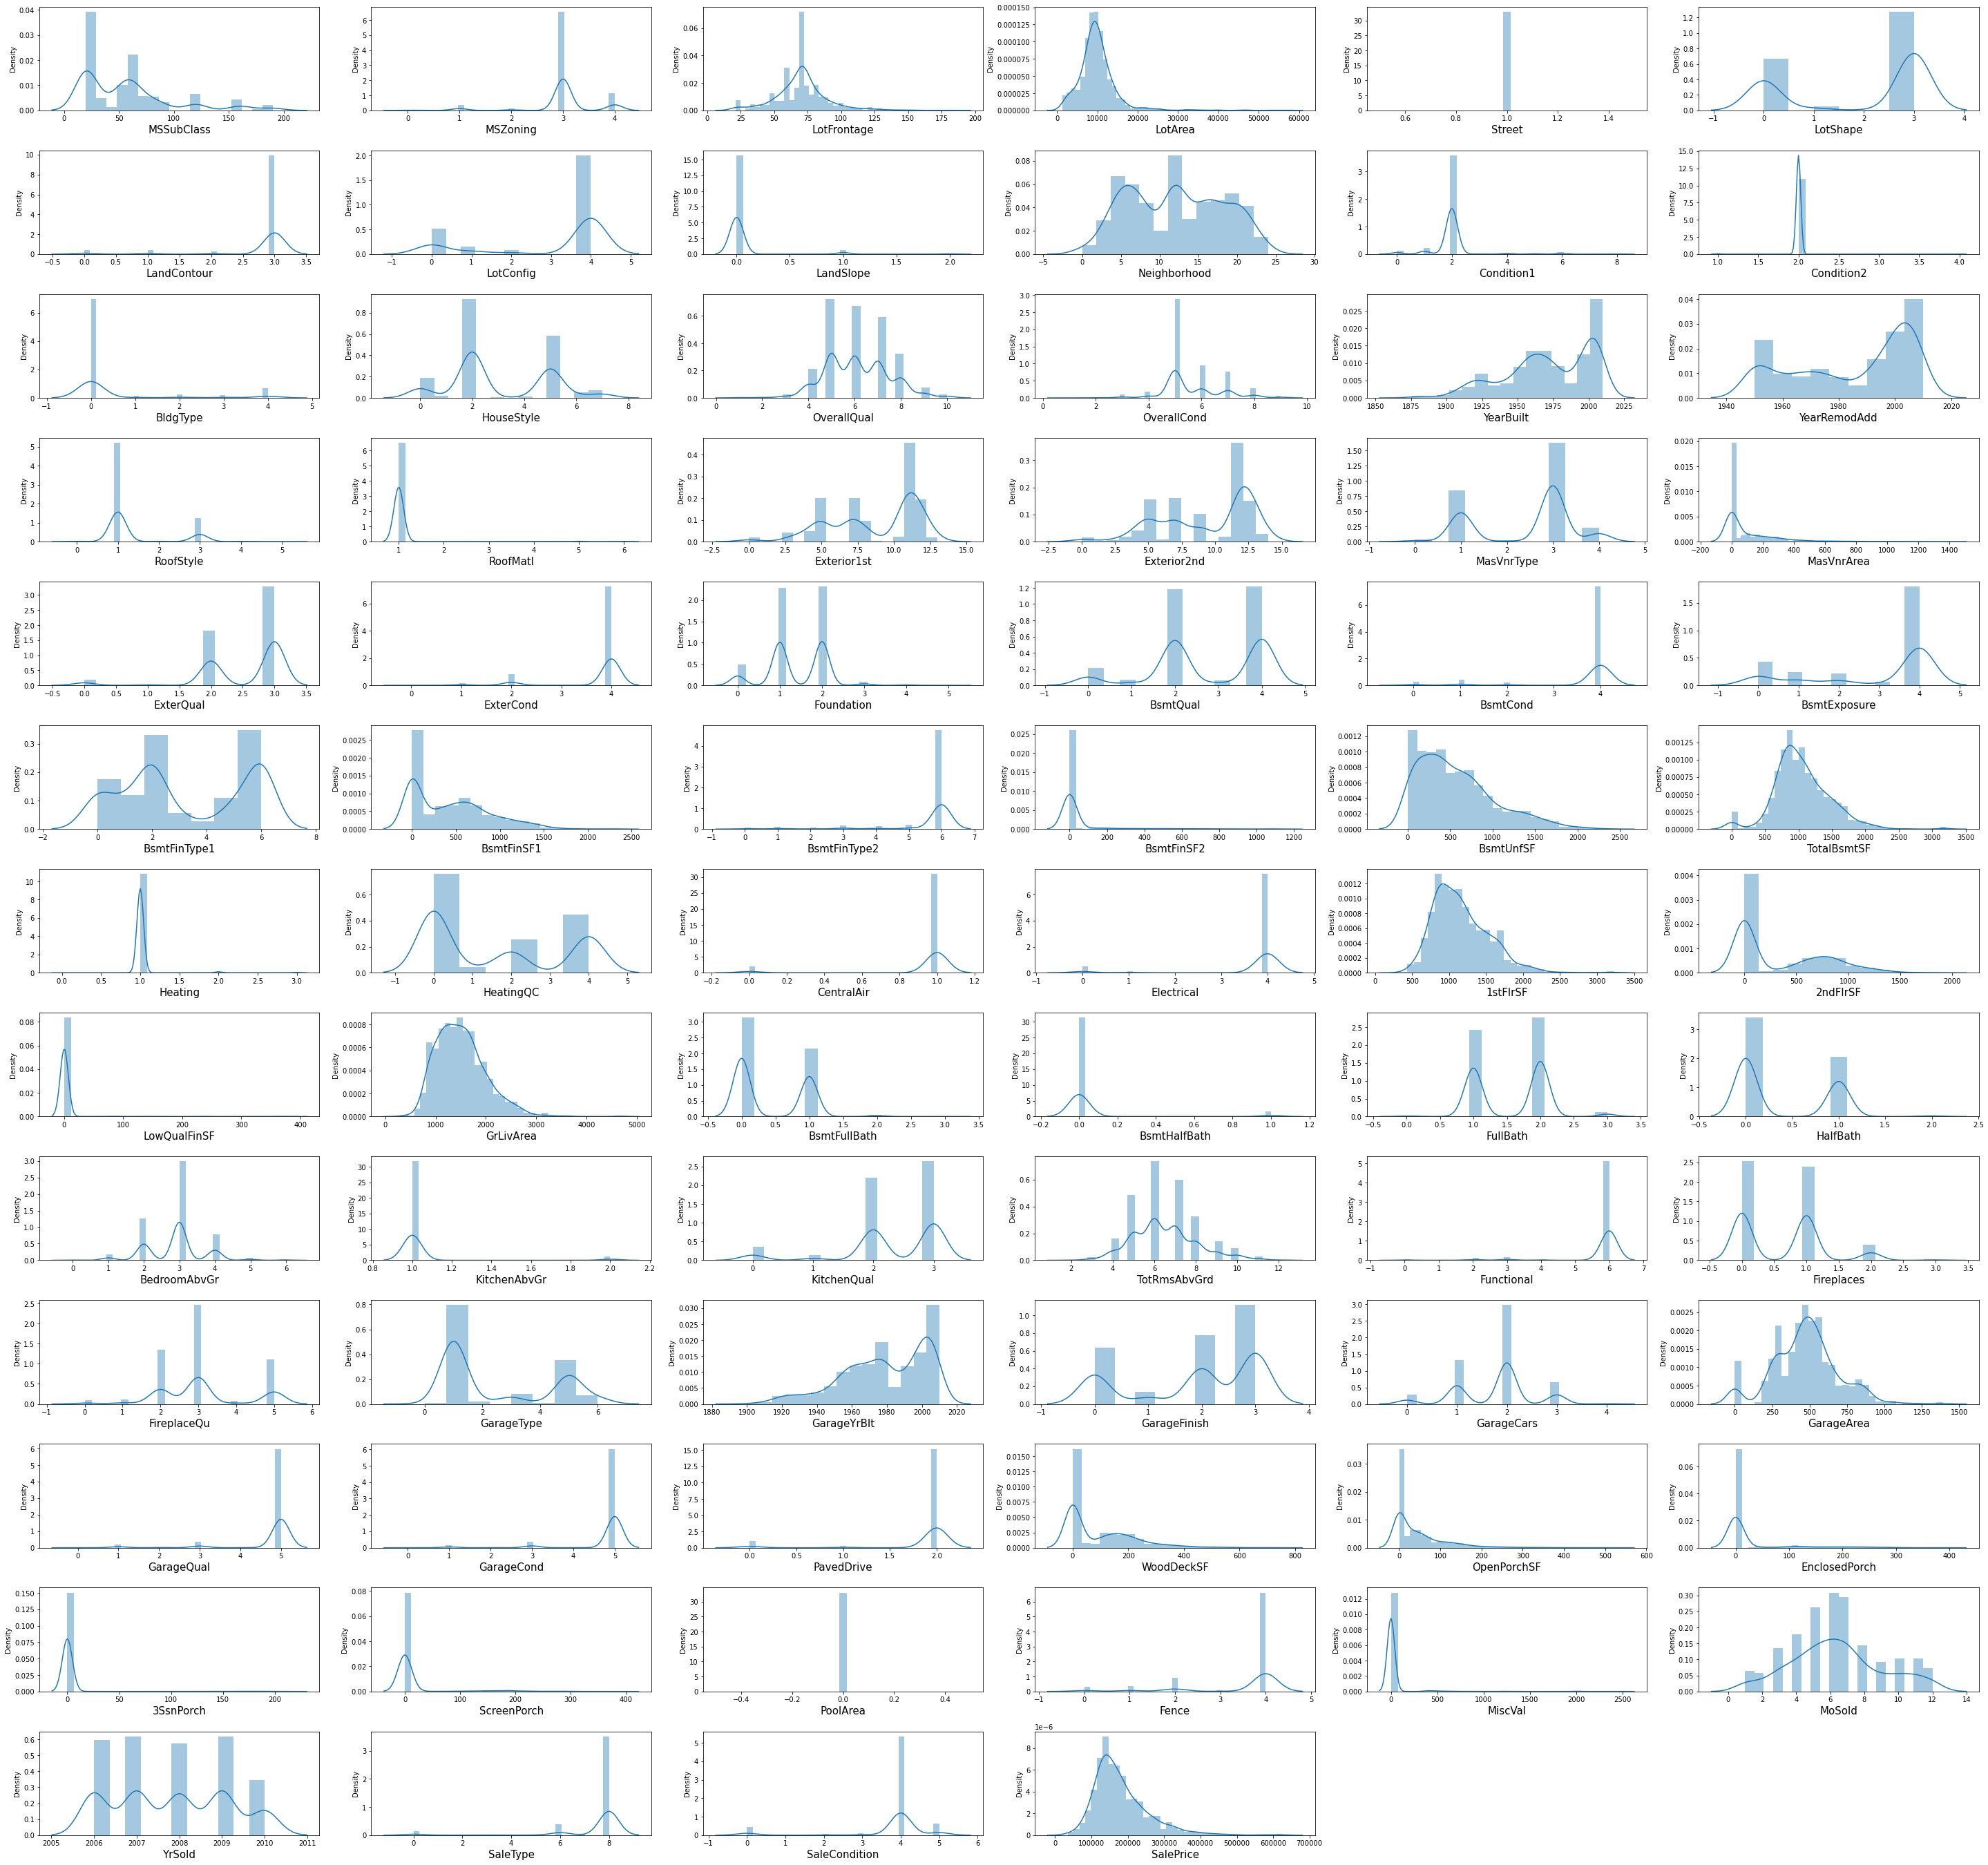

In [32]:
plt.figure(figsize = (40,40))
pltnum = 1
for i in df1:
    if pltnum <= 80:
        plt.subplot(14,6, pltnum)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

Still outliers are present

#### Splitting the data before treating the skewness

In [33]:
x = df1.drop(columns = 'SalePrice')
y = df1['SalePrice']

#### Scaling the data before  treating the skewness
Will do the standard scaler

In [34]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
sc = scal.fit_transform(x)
x = pd.DataFrame(sc, columns = x.columns)

In [35]:
x.skew()

MSSubClass        1.422060
MSZoning         -1.705609
LotFrontage       0.716133
LotArea           3.269748
Street            0.000000
LotShape         -0.622543
LandContour      -3.267184
LotConfig        -1.162836
LandSlope         5.040971
Neighborhood      0.057895
Condition1        3.116130
Condition2        7.673385
BldgType          2.314447
HouseStyle        0.285028
OverallQual       0.157192
OverallCond       0.601976
YearBuilt        -0.589899
YearRemodAdd     -0.510156
RoofStyle         1.509426
RoofMatl          9.545839
Exterior1st      -0.615743
Exterior2nd      -0.596100
MasVnrType       -0.550699
MasVnrArea        2.542936
ExterQual        -1.831179
ExterCond        -2.557072
Foundation       -0.020299
BsmtQual         -0.477206
BsmtCond         -2.846851
BsmtExposure     -0.987132
BsmtFinType1      0.096360
BsmtFinSF1        0.775786
BsmtFinType2     -3.191550
BsmtFinSF2        4.251484
BsmtUnfSF         0.929644
TotalBsmtSF       0.603531
Heating           8.613725
H

#### power transformation technique to treat the skewness in the data yeo-johnson

In [36]:
from sklearn.preprocessing import power_transform
tr = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr, columns = x.columns)

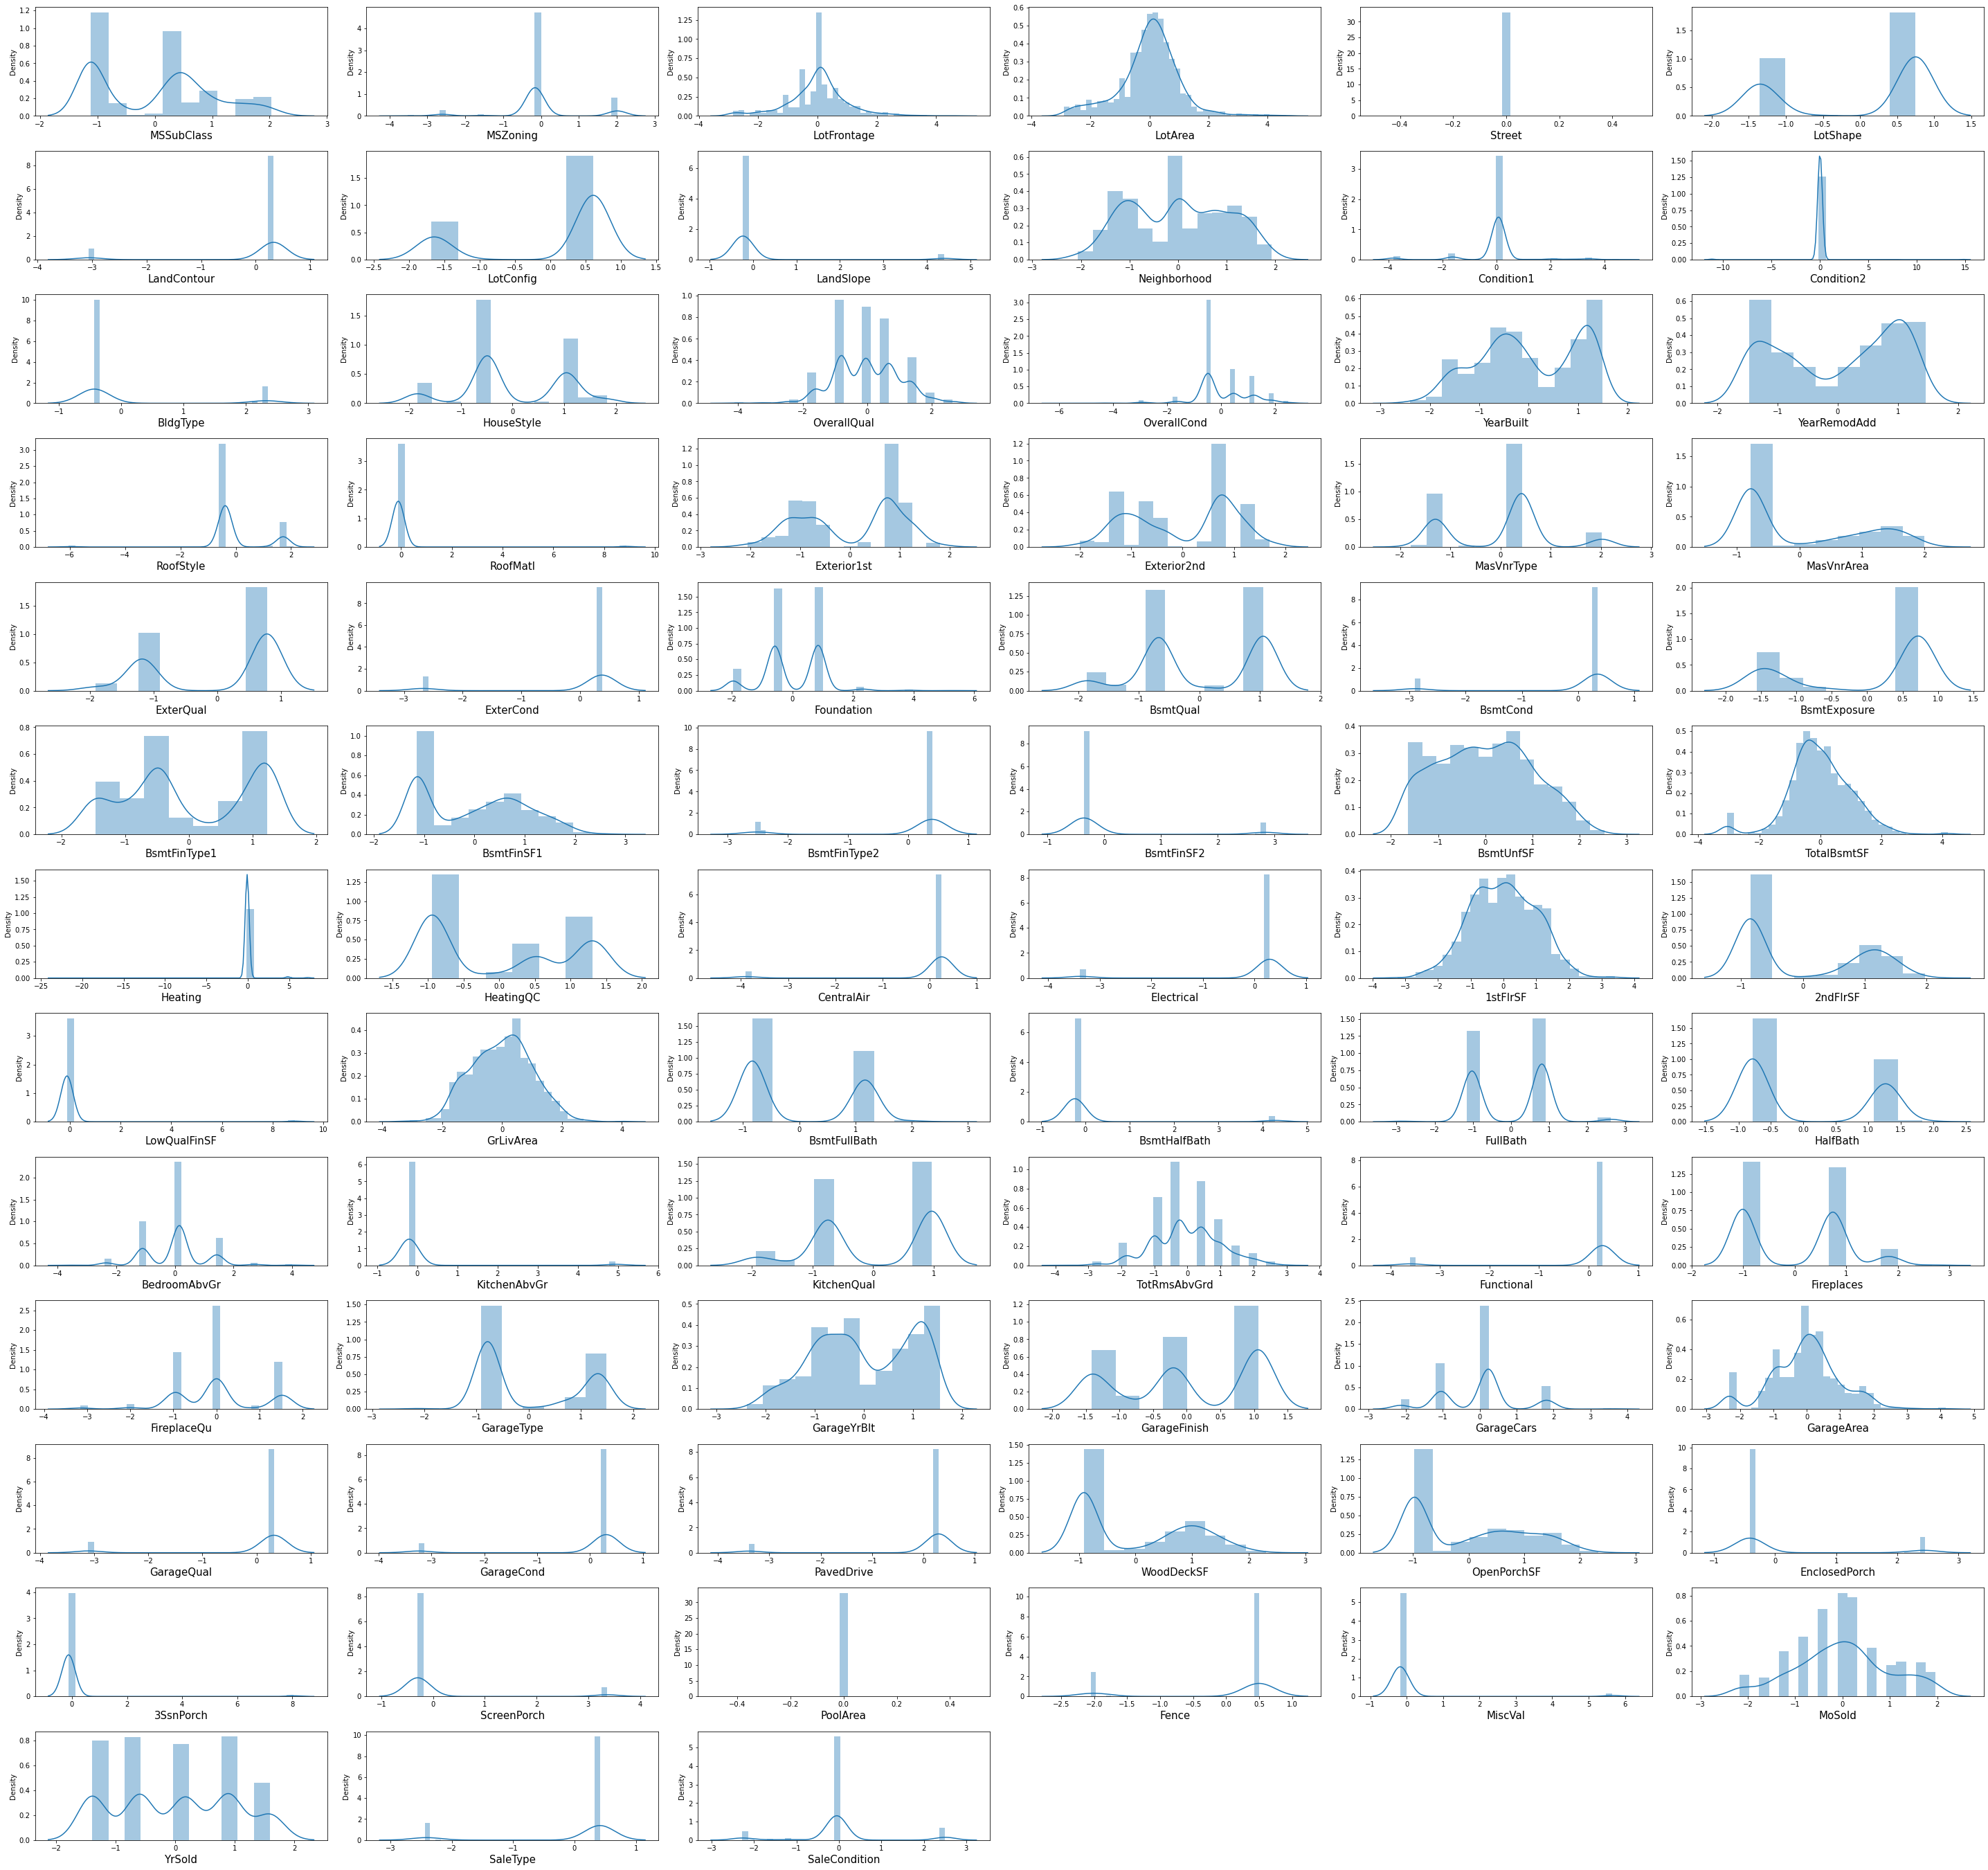

In [37]:
plt.figure(figsize = (40,40))
pltnum = 1
for i in x:
    if pltnum <= 80:
        plt.subplot(14,6, pltnum)
        sns.distplot(x[i])
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

In [38]:
x = x.drop(columns = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2','Exterior2nd'])

### Model Building

SalePrice was my target and it was a continuous column so this perticular problem was regression problem

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

Find R2 score corresponding to random state

In [40]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
rm_st= random_state   
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 40 is 0.8971348404039902


Done train test and split with randome state 

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=rm_st)

Fitting the data to various model and checking the accuracy

In [42]:
dtc=DecisionTreeRegressor()
rfc=RandomForestRegressor()
knn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()
et = ExtraTreesRegressor()
xgb = XGBRegressor()
model=[lr,dtc,rfc,knn,ab,gb,ls,rd,et,xgb]
kf = KFold(n_splits=5, random_state=rm_st, shuffle=True)
train=[]
test=[]
Mse=[]
cv=[]
for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)

Performance={'Model':['Linear Regression','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge','Extra Tree','XGBRegressor'],
             'Training Score':train,'Test Score':test,'Mean Square Error':Mse,'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

Model  Training Score  Test Score  Mean Square Error  \
0  Linear Regression       84.927534   88.445052       6.208591e+08   
1       DecisionTree      100.000000   73.973827       1.398413e+09   
2       RandomForest       97.650312   89.112408       5.850014e+08   
3                KNN       85.971443   82.320600       9.499322e+08   
4           AdaBoost       87.282353   82.626104       9.335171e+08   
5   GradientBoosting       97.038297   90.539984       5.082963e+08   
6              Lasso       84.927758   88.437130       6.212848e+08   
7              Ridge       84.927504   88.436850       6.212998e+08   
8         Extra Tree      100.000000   89.727101       5.519733e+08   
9       XGBRegressor       99.996111   88.169368       6.356719e+08   

   Cross Validation Score  
0               82.531217  
1               70.049542  
2               85.892982  
3               79.860453  
4               79.472675  
5               86.050044  
6               82.523758  
7               82.547934  
8               85.880786  
9               82.298194

# Hyper parameter tuning 

##### Hyper parameter tuning RandomForest Regressor

In [43]:
params ={'n_estimators':[100,200,300,400],
        'max_depth':[13,15,17,19],
        'min_samples_split':[3,4,5,6],
        'criterion':['mse','mae']}

In [44]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(RandomForestRegressor(), params, cv =5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [13, 15, 17, 19],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [45]:
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 13,
 'min_samples_split': 4,
 'n_estimators': 400}

In [46]:
Finalmod_max= RandomForestRegressor(criterion = 'mse',max_depth = 13, min_samples_split = 4, n_estimators = 400)
Finalmod_max.fit(x_train,y_train)
pred_test=Finalmod_max.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod_max,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

RandomForestRegressor Performance
---------------------------------------------------
Accuracy Score 89.30143826541472
Cross Validation score 86.02295617933564
Mean Square Error 574844617.6756921


##### Hyper parameter tuning ExtraTrees Regressor

In [47]:
params = {'n_estimators':[100,150,200,250],
         'max_depth':[7,9,11,13,15],
         'min_samples_split':[3,4,6,8],
         'bootstrap':[True, False],
         'n_jobs':[-1,-2,-3]}

In [48]:
et = GridSearchCV(ExtraTreesRegressor(), params, cv =5, n_jobs = -1)
et.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [7, 9, 11, 13, 15],
                         'min_samples_split': [3, 4, 6, 8],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [49]:
et.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'min_samples_split': 4,
 'n_estimators': 250,
 'n_jobs': -3}

In [50]:
Finalmod_et= ExtraTreesRegressor(n_estimators=250,max_depth=11,min_samples_split=4,bootstrap='True',n_jobs=-3)
Finalmod_et.fit(x_train,y_train)
pred_test=Finalmod_et.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod_et,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('ExtraTreesRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

ExtraTreesRegressor Performance
---------------------------------------------------
Accuracy Score 89.21531897172173
Cross Validation score 85.70943156781861
Mean Square Error 579471895.0318074


In [51]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}

In [52]:
GBR=GradientBoostingRegressor()
gbr1=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [500, 1000, 2000], 'random_state': [1],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error')

In [53]:
gbr1.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 0.5}

In [54]:
Finalmod_gbr1= GradientBoostingRegressor(n_estimators=2000,max_depth=4,learning_rate= 0.01,random_state= 1,subsample= 0.5)
Finalmod_gbr1.fit(x_train,y_train)
pred_test=Finalmod_gbr1.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod_gbr1,x,y,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('GradientBoostingRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

GradientBoostingRegressor Performance
---------------------------------------------------
Accuracy Score 91.38653046870057
Cross Validation score 87.21272324159783
Mean Square Error 462810490.0843456


### Best Model Saving 

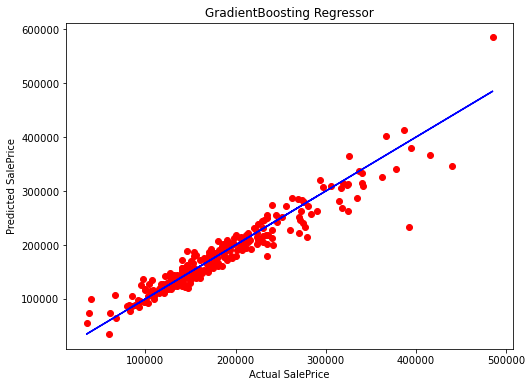

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('GradientBoosting Regressor')
plt.show()

In [48]:
import pickle
filename='HusePricePredict.pkl'
pickle.dump(Finalmod_gbr1,open(filename,'wb'))

Y Test           Pred
703   290000  263791.074864
1112  236000  217979.098092
135   123000  126480.652957
542   135000  130302.787214
166   180000  206630.782290

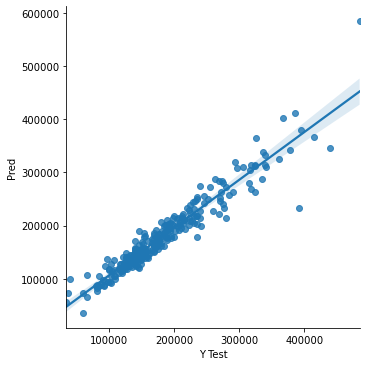

In [49]:
res=pd.DataFrame()
res['Actual']=y_test
pred_lr=Finalmod_gbr1.predict(x_test)

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

### Test Dataset

In [55]:
test_data = pd.read_csv('test.csv')

In [56]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [57]:
test_data.drop(columns = ['Alley','MiscFeature','PoolQC','Id'],axis=1,inplace=True)

In [58]:
feature=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in test_data[feature]:
    test_data[i]=test_data[i].fillna(test_data[i].mean())

In [59]:
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')
test_data['GarageType'] = test_data['GarageType'].fillna('NA')
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('NA')

In [60]:
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [61]:
encoder = OrdinalEncoder()
for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = encoder.fit_transform(test_data[i].values.reshape(-1,1))

In [62]:
test_data.drop(columns = ['Utilities'],axis=1,inplace=True)

In [63]:
scal = StandardScaler()
sc = scal.fit_transform(test_data)
x1 = pd.DataFrame(sc, columns = test_data.columns)

In [64]:
tr1 = power_transform(x1, method = 'yeo-johnson')
x1 = pd.DataFrame(tr1, columns = x1.columns)

In [65]:
x1 = x1.drop(columns = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2','Exterior2nd'])

In [66]:
#Testing our model
import sys
nums= Finalmod_gbr1.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[346027.41848322 200977.17154494 243860.00540074 190402.59818335
 199695.93218853  72519.05054686 136379.34625173 324410.50324243
 237571.7459191  177201.41312654  57703.68115631 141314.3966028
 120678.75131653 169168.48162276 246237.21434656 124034.38129803
 117226.46861248 121752.93557982 176630.46254061 194965.32557507
 162774.21982419 143220.44336346 145989.27370271  73496.22546937
  99120.08443924 133236.75518212 171420.45713128 145682.49171837
 179676.84159713  88372.12685909 130419.15367505 192913.42493787
 217094.86003035 166689.14025867 114591.37973141 175459.9463042
 190606.49857248 123159.6725455  165151.40865041 150203.96003436
  99109.77908851 328602.181204   194133.825616   187863.90846899
 138438.05438136 128785.39935552 125803.14668504  93395.43804296
 215157.21297002 335681.04244684 142485.80496127 192798.13395412
 102245.05871676  98537.15872115 281540.98004946 126093.97310687
 143008.48425367 189513.94444279 100334.20688301 216344.79078257
 101210.34849371 178655.369